In [ ]:
pip install sysidentpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Final Dataset.xlsx to Final Dataset (1).xlsx


In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install numpy pandas matplotlib statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [ ]:
%matplotlib inline
var=pd.read_excel('Final Dataset.xlsx', sheet_name='Model_Dataset', skiprows=[0, 2]) 
# var.dropna(inplace=True)
var.head()

,Date,BNB-USD,BTC-USD,ETH-USD,USDT-USD,XRP-USD,ADA-USD,BITG-USD,MIOTA-USD,XNO-USD,POWR-USD,Power,Ground Transport,Residential,Domestic Aviation,International Aviation
0,2019-01-03,-0.283723,-0.146478,-0.218059,-0.242175,-0.213296,-0.133797,0.272976,-0.350994,-0.212519,-0.541858,0.017161,0.100704,-0.013013,0.037922,0.026545
1,2019-01-04,0.250258,0.067790,0.155431,0.110796,0.026443,-0.276461,-0.199125,0.001564,0.155184,-0.798119,0.015954,0.002050,-0.008488,-0.013425,0.013110
2,2019-01-05,0.034520,0.058029,0.065619,0.024849,0.003227,0.448817,-1.063302,-0.364719,0.394051,0.533827,-0.031367,-0.072048,-0.042761,-0.084376,0.028308
3,2019-01-06,0.314991,0.085648,-0.032553,0.056192,0.085732,0.716078,-0.655398,0.427898,0.268170,1.404755,-0.020110,-0.145075,-0.015340,0.001235,0.016680
4,2019-01-07,-0.092145,-0.068087,-0.175156,-0.115993,0.013049,-0.117139,0.675955,-0.436056,-0.465483,-1.400369,0.045889,0.199612,0.012749,0.042424,-0.069635


In [ ]:
BITGUSD_var=var.iloc[:, 7]

In [ ]:
output_var=var.iloc[:, 11]

In [ ]:
var.isna()

,Date,BNB-USD,BTC-USD,ETH-USD,USDT-USD,XRP-USD,ADA-USD,BITG-USD,MIOTA-USD,XNO-USD,POWR-USD,Power,Ground Transport,Residential,Domestic Aviation,International Aviation
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
var=var.drop(columns=["BTC-USD", "ETH-USD",	"USDT-USD",	"XRP-USD", "ADA-USD",	"BNB-USD",	"MIOTA-USD",	"XNO-USD",	"POWR-USD", "Ground Transport", "Residential", "Domestic Aviation", "International Aviation"])

In [ ]:
var.isnull().sum()

Date         0
BITG-USD    34
Power        0
dtype: int64

In [ ]:
var.dropna(inplace=True)


In [ ]:
var.isnull().sum()

Date        0
BITG-USD    0
Power       0
dtype: int64

In [ ]:
len(var)

1515

In [ ]:
var.tail()

,Date,BITG-USD,Power
1544,2023-03-27,-0.029414,0.037557
1545,2023-03-28,0.014815,0.031142
1546,2023-03-29,1.317827,-0.016223
1547,2023-03-30,-0.472632,-0.022966
1548,2023-03-31,0.016702,-0.020821


<Axes: >

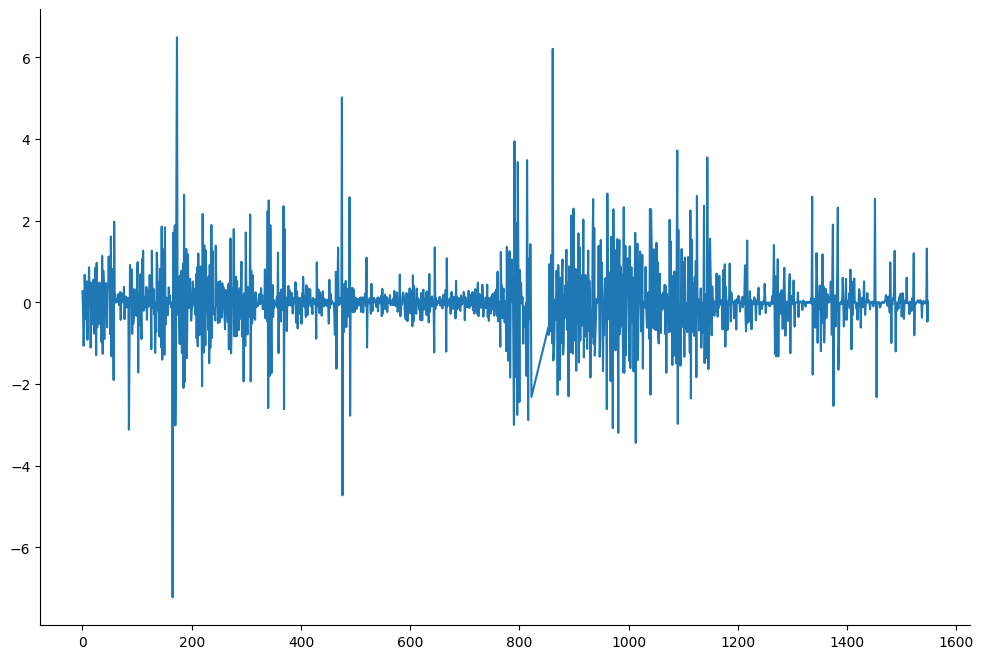

In [ ]:
var['BITG-USD'].plot(figsize=(12, 8))


<Axes: >

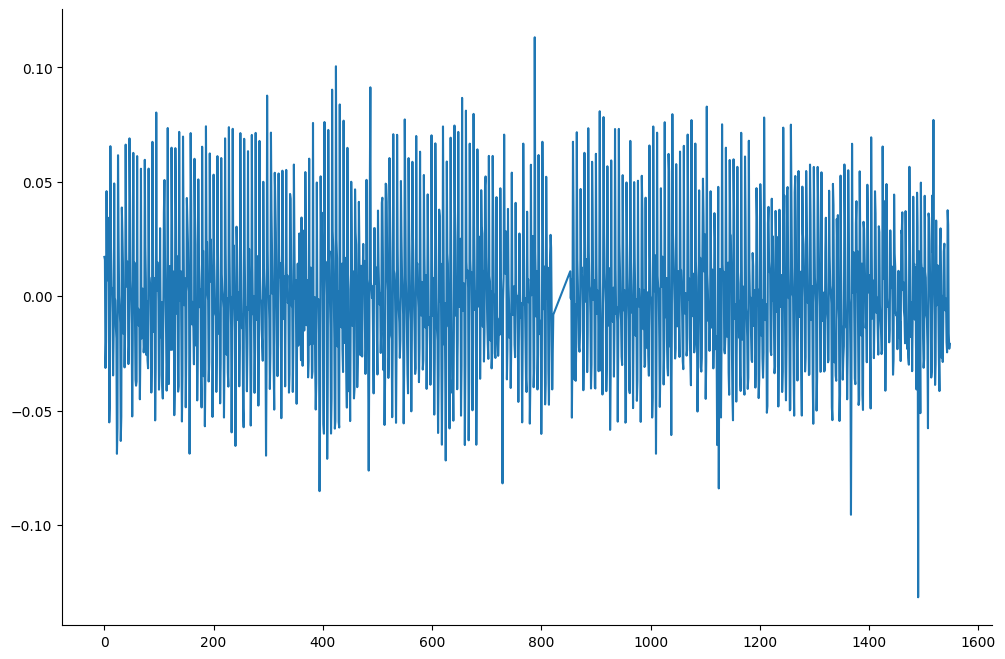

In [ ]:
var['Power'].plot(figsize=(12, 8))


<Axes: >

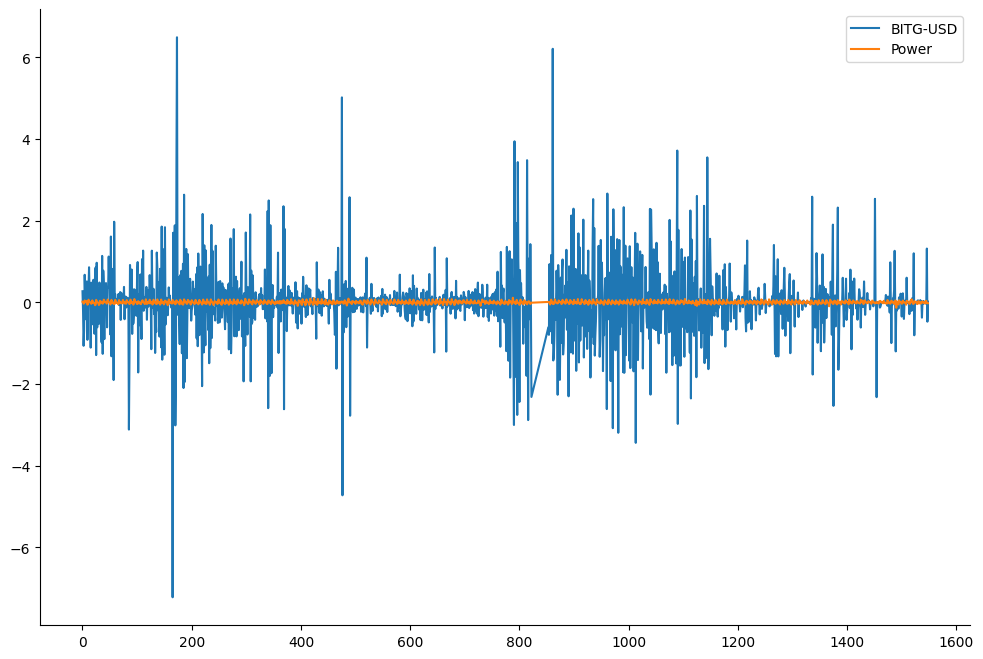

In [ ]:
var[['BITG-USD', 'Power']].plot(figsize=(12, 8))


In [ ]:
df=pd.DataFrame(var['BITG-USD'])
x = df.to_numpy()
df1=pd.DataFrame(var['Power'])
S= df1.to_numpy()

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x,S,train_size=0.85,shuffle= False)


In [ ]:
df

,BITG-USD
0,0.272976
1,-0.199125
2,-1.063302
3,-0.655398
4,0.675955
...,...
1544,-0.029414
1545,0.014815
1546,1.317827
1547,-0.472632


In [ ]:
len(df)

1515

In [ ]:
df.isnull().sum()

BITG-USD    0
dtype: int64

In [ ]:
df1

,Power
0,0.017161
1,0.015954
2,-0.031367
3,-0.020110
4,0.045889
...,...
1544,0.037557
1545,0.031142
1546,-0.016223
1547,-0.022966


In [ ]:
len(x_valid)

228

In [ ]:
len(y_valid)
# len(y_train)

228

In [ ]:
len(x_train)

1287

In [ ]:
# # Concatenate input features and target variable for the validation set
# valid_data = np.column_stack((x_valid, y_valid))

In [ ]:
basis_function = Polynomial(degree=3)

model = FROLS(
    order_selection=True,
    n_terms=50,
    extended_least_squares=False,
    ylag=15,
    xlag=15,   
    info_criteria='bic',
    estimator='least_squares',
    basis_function=basis_function
)

/usr/local/lib/python3.10/dist-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)


In [ ]:
model.fit(X=x_train, y=y_train)

In [ ]:
yhat = model.predict(X=x_valid, y=y_valid, steps_ahead=None)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)

0.60525837059183
                 Regressors   Parameters             ERR
0                    y(k-7)   6.7008E-01  6.61864806E-01
1                   y(k-14)   2.2532E-01  4.86499669E-02
2       y(k-11)y(k-7)y(k-4)  -1.2262E+02  9.17177518E-03
3           y(k-10)^2y(k-7)  -4.6389E+01  6.73281840E-03
4       y(k-11)y(k-4)y(k-1)   2.4502E+01  5.15936636E-03
5                    y(k-2)  -2.3653E-01  9.14107795E-03
6                    y(k-4)  -1.2533E-01  6.55874246E-03
7             y(k-14)y(k-5)   1.5279E+00  5.30016558E-03
8              y(k-9)y(k-2)   2.5128E+00  7.16755770E-03
9            y(k-6)^2y(k-1)   3.6704E+01  7.47046336E-03
10      y(k-15)y(k-8)y(k-7)  -3.9685E+01  4.28511280E-03
11    x1(k-11)x1(k-4)y(k-3)  -6.6158E-02  2.72376965E-03
12                 y(k-7)^3  -5.5391E+01  2.14552364E-03
13          y(k-15)y(k-7)^2  -5.3748E+01  3.49626880E-03
14           y(k-7)y(k-2)^2  -6.8343E+01  2.45827353E-03
15      y(k-13)y(k-9)y(k-6)   5.7642E+01  2.28173014E-03
16  x1(k-12)x1

In [ ]:
r["ERR"] = pd.to_numeric(r["ERR"], downcast="float") 
    
print('Sum of ERR=  ',r['ERR'].sum())  

Sum of ERR=   0.8332984


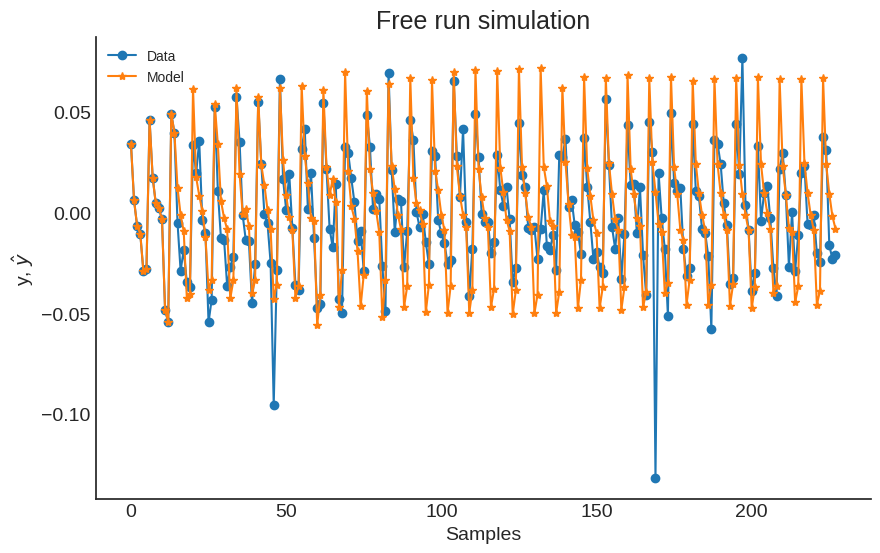

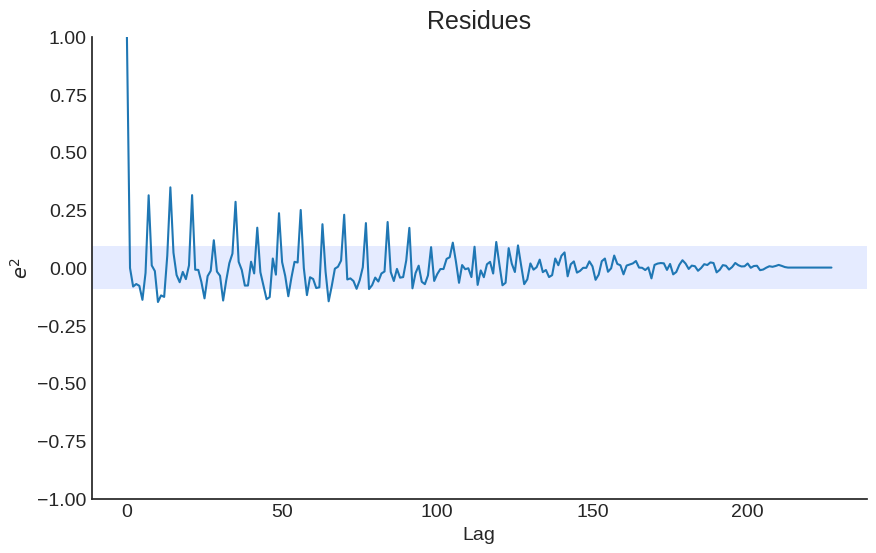

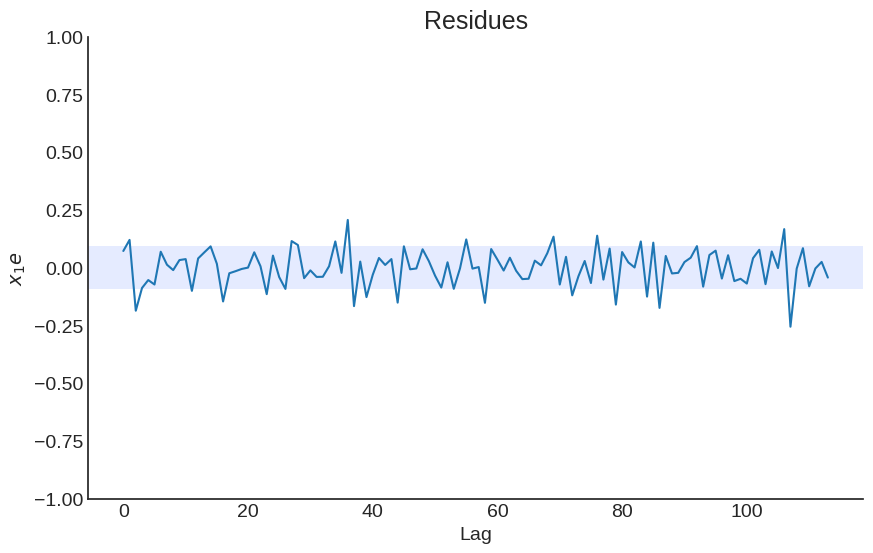

In [ ]:
plot_results(y=y_valid, yhat = yhat, n=250)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

0.7568246559612675


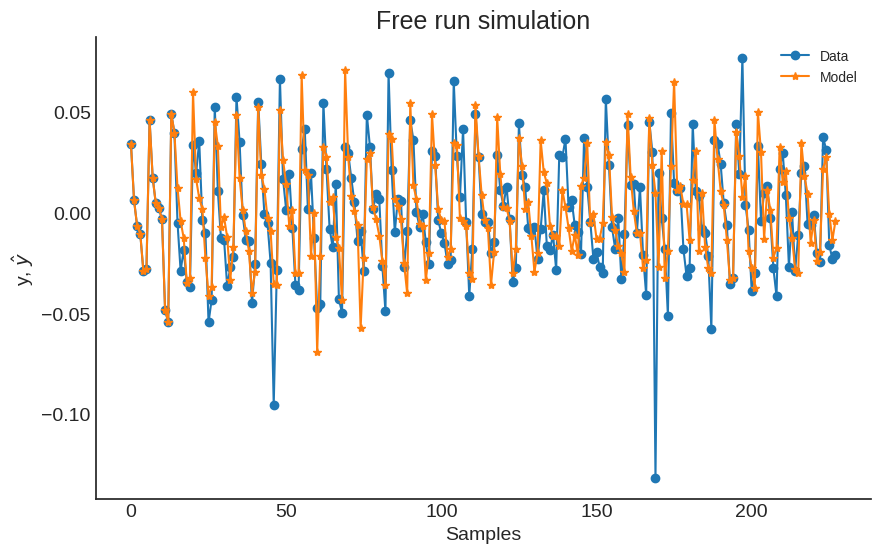

In [ ]:
yhat = model.predict(X=x_valid, y=y_valid, steps_ahead=1)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)
plot_results(y=y_valid, yhat = yhat, n=250)


0.722917163588835


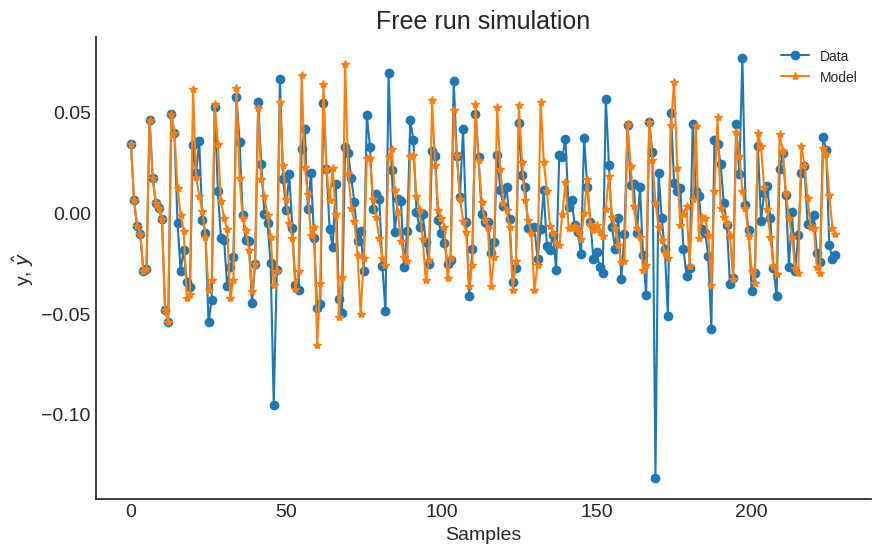

In [ ]:
yhat = model.predict(X=x_valid, y=y_valid, steps_ahead=20)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)
plot_results(y=y_valid, yhat = yhat, n=250)

In [ ]:
t2 = var['Date'][1287:1515]

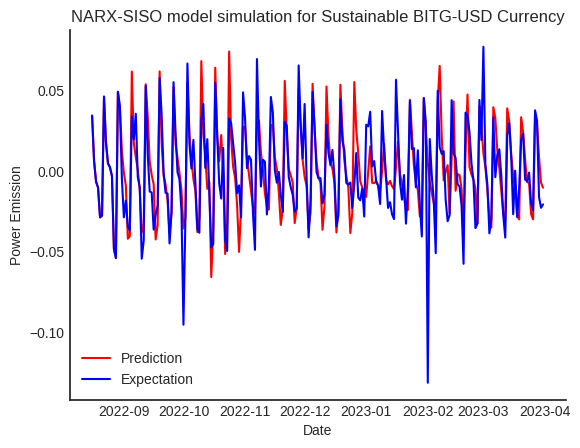

In [ ]:
plt.plot(t2, yhat, label = "Prediction", color='red')

# plotting the line 2 points 
plt.plot(t2, y_valid, label = "Expectation", color='blue')
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('Power Emission')
# Set a title of the current axes.
plt.title('NARX-SISO model simulation for Sustainable BITG-USD Currency')
# show a legend on the plot
plt.legend()
plt.savefig('SISO_fw.png')

In [ ]:
len(yhat)

228

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(yhat, S[1287:1515])

rmse(yhat, y_valid)

0.019519980647870597

In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(S[1287:1515], yhat, squared=False)
rms

0.019519980647870597

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_valid, yhat)
mae

0.01268200531959799

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_valid, yhat)
mape

1.5529556024882358

In [ ]:
from numpy import savetxt
savetxt('yhat.csv', yhat, delimiter=',')
r.to_csv('Model_Structure.csv')
df_1 = pd.DataFrame(S[1287:1515], columns=['Expectation-O/P'])
df_1

,Expectation-O/P
0,0.034271
1,0.006073
2,-0.006707
3,-0.010456
4,-0.028897
...,...
223,0.037557
224,0.031142
225,-0.016223
226,-0.022966


In [ ]:
df_1['Prediction-O/P'] = yhat
df_1

,Expectation-O/P,Prediction-O/P
0,0.034271,0.034271
1,0.006073,0.006073
2,-0.006707,-0.006707
3,-0.010456,-0.010456
4,-0.028897,-0.028897
...,...,...
223,0.037557,0.031933
224,0.031142,0.029062
225,-0.016223,0.008706
226,-0.022966,-0.007395


In [ ]:
len(df_1)
df_1.columns

Index(['Expectation-O/P', 'Prediction-O/P'], dtype='object')

In [ ]:
import plotly.express as px 
import pandas as pd 
import numpy as np 

# data
fig = px.line(df_1, x=var ['Date'][1287:1515], y= df_1.columns[0:2],labels=dict(value="Power Emission"),title="NARX-SISO model simulation for Sustainable BITG-USD Currency")

# Show plot 
fig.show()

In [ ]:
import plotly.graph_objects as go

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x= var['Date'][1287:1515], y=df_1["Expectation-O/P"], name="Expectation", mode="lines"))
fig2.add_trace(go.Scatter(x= var['Date'][1287:1515], y=df_1["Prediction-O/P"], name="Prediction", mode="lines"))
fig2.update_layout(
    title="NARX-SISO model simulation for Sustainable BITG-USD Currency", xaxis_title="Year", yaxis_title="Power Emission"
)
fig2.show()